In [1]:
# ModelEvaluation.ipynb

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt





In [5]:

# Load forecasts
forecasts_arima_sarimax = pd.read_csv('C:/Users/HP/Desktop/times_series_project/Datasets/predictions_comparison.csv')
forecasts_xgboost = pd.read_csv('C:/Users/HP/Desktop/times_series_project/Datasets/predictions_xgboost.csv')

In [6]:
print(forecasts_arima_sarimax.head())

   Unnamed: 0        Date  Actual_Production  ARIMA_Predicted  \
0  2007-09-01  2007-09-01           100.3374       108.969172   
1  2007-10-01  2007-10-01            91.8884       100.804804   
2  2007-11-01  2007-11-01            92.7412        96.394515   
3  2007-12-01  2007-12-01           105.4420        98.309034   
4  2008-01-01  2008-01-01           113.4467       103.664933   

   SARIMAX_Predicted  Actual_log_production  ARIMA_Predicted_LOG  \
0         100.604915               4.608539             4.691065   
1          92.779843               4.520575             4.613186   
2          94.353362               4.529813             4.568449   
3         108.568322               4.658161             4.588116   
4         115.610883               4.731333             4.641164   

   SARIMAX_Predicted_LOG  
0               4.611201  
1               4.530229  
2               4.547047  
3               4.687380  
4               4.750230  


In [7]:
print(forecasts_xgboost.head())

         Date      Date.1  XGBoost_Predicted
0  2007-09-01  2007-09-01          99.349556
1  2007-10-01  2007-10-01          94.309390
2  2007-11-01  2007-11-01          95.397514
3  2007-12-01  2007-12-01         104.597100
4  2008-01-01  2008-01-01         110.763115


In [8]:
del forecasts_arima_sarimax['Unnamed: 0']

In [9]:
del forecasts_xgboost['Date.1']

In [10]:
# Convert the Date column to datetime format
forecasts_arima_sarimax['Date'] = pd.to_datetime(forecasts_arima_sarimax['Date'])

# Set DATE as the index 
forecasts_arima_sarimax.set_index('Date', inplace=True)
forecasts_arima_sarimax.head()

,Actual_Production,ARIMA_Predicted,SARIMAX_Predicted,Actual_log_production,ARIMA_Predicted_LOG,SARIMAX_Predicted_LOG
Date,,,,,,
2007-09-01,100.3374,108.969172,100.604915,4.608539,4.691065,4.611201
2007-10-01,91.8884,100.804804,92.779843,4.520575,4.613186,4.530229
2007-11-01,92.7412,96.394515,94.353362,4.529813,4.568449,4.547047
2007-12-01,105.4420,98.309034,108.568322,4.658161,4.588116,4.687380
2008-01-01,113.4467,103.664933,115.610883,4.731333,4.641164,4.750230


In [11]:
# Convert the Date column to datetime format
forecasts_xgboost['Date'] = pd.to_datetime(forecasts_xgboost['Date'])

# Set DATE as the index 
forecasts_xgboost.set_index('Date', inplace=True)
forecasts_xgboost.head()

,XGBoost_Predicted
Date,
2007-09-01,99.349556
2007-10-01,94.309390
2007-11-01,95.397514
2007-12-01,104.597100
2008-01-01,110.763115


In [12]:
# Concatenate two DataFrames along columns (axis=1)
forecasts = pd.concat([forecasts_arima_sarimax, forecasts_xgboost], axis=1)

# Check the combined DataFrame
print(forecasts.head())

            Actual_Production  ARIMA_Predicted  SARIMAX_Predicted  \
Date                                                                
2007-09-01           100.3374       108.969172         100.604915   
2007-10-01            91.8884       100.804804          92.779843   
2007-11-01            92.7412        96.394515          94.353362   
2007-12-01           105.4420        98.309034         108.568322   
2008-01-01           113.4467       103.664933         115.610883   

            Actual_log_production  ARIMA_Predicted_LOG  SARIMAX_Predicted_LOG  \
Date                                                                            
2007-09-01               4.608539             4.691065               4.611201   
2007-10-01               4.520575             4.613186               4.530229   
2007-11-01               4.529813             4.568449               4.547047   
2007-12-01               4.658161             4.588116               4.687380   
2008-01-01               4.731

<Axes: xlabel='Date'>

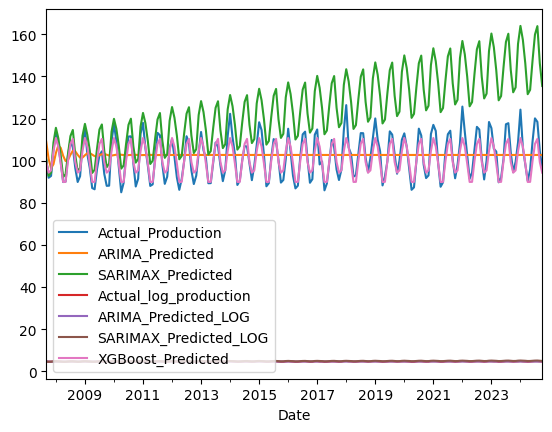

In [13]:
forecasts.plot()

In [14]:
# Calculate MSE and RMSE for each model
def calculate_rmse(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    return mse, rmse

# Get MSE and RMSE for each model
mse_xgb, rmse_xgb = calculate_rmse(forecasts['Actual_Production'], forecasts['XGBoost_Predicted'])
mse_arima, rmse_arima = calculate_rmse(forecasts['Actual_Production'], forecasts['ARIMA_Predicted'])
mse_sarimax, rmse_sarimax = calculate_rmse(forecasts['Actual_Production'], forecasts['SARIMAX_Predicted'])

mse_arima, rmse_arima = calculate_rmse(forecasts['Actual_log_production'], forecasts['ARIMA_Predicted_LOG'])
mse_sarimax, rmse_sarimax = calculate_rmse(forecasts['Actual_log_production'], forecasts['SARIMAX_Predicted_LOG'])

# Print MSE and RMSE for each model
print(f"MSE for XGBoost: {mse_xgb}, RMSE for XGBoost: {rmse_xgb}")
print(f"MSE for ARIMA: {mse_arima}, RMSE for ARIMA: {rmse_arima}")
print(f"MSE for SARIMAX: {mse_sarimax}, RMSE for SARIMAX: {rmse_sarimax}")
print(f"MSE for ARIMA using LOG: {mse_arima}, RMSE for ARIMA using LOG: {rmse_arima}")
print(f"MSE for SARIMAX using LOG: {mse_sarimax}, RMSE for SARIMAX using LOG: {rmse_sarimax}")



MSE for XGBoost: 20.89330118870779, RMSE for XGBoost: 4.570919074836897
MSE for ARIMA: 0.009409665182996638, RMSE for ARIMA: 0.09700342871773471
MSE for SARIMAX: 0.0477572375980474, RMSE for SARIMAX: 0.21853429387180265
MSE for ARIMA using LOG: 0.009409665182996638, RMSE for ARIMA using LOG: 0.09700342871773471
MSE for SARIMAX using LOG: 0.0477572375980474, RMSE for SARIMAX using LOG: 0.21853429387180265


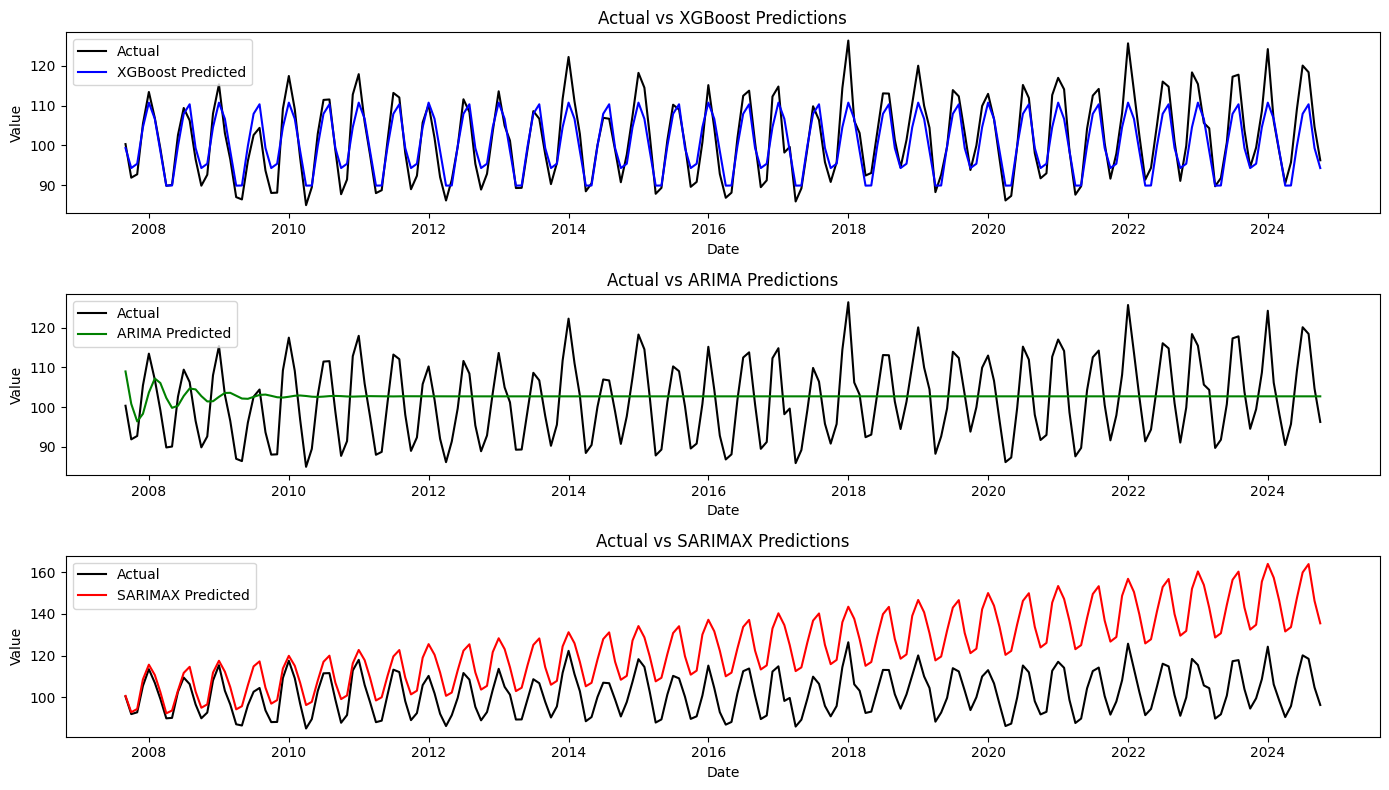

In [15]:


# Assuming 'forecasts' is your DataFrame, and 'Date' is the index
plt.figure(figsize=(14, 8))

# Plot Actual vs Predicted for XGBoost
plt.subplot(3, 1, 1)
plt.plot(forecasts.index, forecasts['Actual_Production'], label='Actual', color='black')  # Use index for x-axis
plt.plot(forecasts.index, forecasts['XGBoost_Predicted'], label='XGBoost Predicted', color='blue')
plt.title('Actual vs XGBoost Predictions')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Plot Actual vs Predicted for ARIMA
plt.subplot(3, 1, 2)
plt.plot(forecasts.index, forecasts['Actual_Production'], label='Actual', color='black')  # Use index for x-axis
plt.plot(forecasts.index, forecasts['ARIMA_Predicted'], label='ARIMA Predicted', color='green')
plt.title('Actual vs ARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Plot Actual vs Predicted for SARIMAX
plt.subplot(3, 1, 3)
plt.plot(forecasts.index, forecasts['Actual_Production'], label='Actual', color='black')  # Use index for x-axis
plt.plot(forecasts.index, forecasts['SARIMAX_Predicted'], label='SARIMAX Predicted', color='red')
plt.title('Actual vs SARIMAX Predictions')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()



plt.tight_layout()
plt.show()


### Analyzing Models Performance
Model Performance Comparison

Based on the provided plots, MSE, and RMSE values, we can make the following observations:

XGBoost:

Visual Analysis: The XGBoost predictions closely follow the actual values, capturing the overall trend and seasonal patterns effectively.
MSE and RMSE: The lowest MSE and RMSE values indicate that XGBoost has the best overall performance among the three models.

ARIMA:

Visual Analysis: The ARIMA model captures the overall trend but struggles to accurately predict the peaks and troughs in the seasonal pattern.
MSE and RMSE: The higher MSE and RMSE values compared to XGBoost suggest that ARIMA is less accurate in its predictions.

SARIMAX:

Visual Analysis: The SARIMAX model significantly underestimates the peaks and overestimates the troughs in the seasonal pattern.
MSE and RMSE: The highest MSE and RMSE values indicate that SARIMAX performs the worst among the three models.

Conclusion:

Based on the visual analysis and quantitative metrics (MSE and RMSE), XGBoost emerges as the best-performing model. It accurately captures the underlying patterns in the data, including the seasonal variations.

Why Choose XGBoost?

Flexibility: XGBoost can handle complex patterns and non-linear relationships in the data.
Ensemble Learning: It leverages an ensemble of decision trees, reducing overfitting and improving generalization.
Feature Importance: XGBoost can provide insights into the importance of different features in the model.

Optimizing Other Models:

While XGBoost has demonstrated superior performance in this case, it's important to consider the specific characteristics of your data and the problem you're trying to solve. Here are some strategies to optimize the ARIMA and SARIMA models:

ARIMA:

Model Selection: we can experiment with different ARIMA orders (p, d, q) to find the best fit.
Feature Engineering: we can create additional features, such as lagged values or trend components, to improve the model's performance.


SARIMAX:

Seasonal Component: we can ensure that the seasonal component (P, D, Q, s) is correctly specified to capture the seasonal patterns in the data.
Model Order: we can experiment with different orders for the seasonal and non-seasonal components.
Diagnostic Checks: we can use residual analysis to identify any model misspecifications or violations of assumptions.
Additional Considerations:


Ensemble Methods: we can combine multiple models (e.g., XGBoost, ARIMA, SARIMA) using techniques like bagging or boosting to improve overall accuracy.


### Conclusion 

While ARIMA's RMSE (0.09) looks better in a raw comparison, it’s important to consider the transformation of the data and the model’s ability to capture complex patterns.
XGBoost performs better because it captures non-linear patterns and seasonal effects more effectively and works directly with the raw data (rather than transformed data), providing more meaningful predictions in the original scale.
Thus, XGBoost’s RMSE of 4.57 is likely better in practical terms for forecasting future data, even though ARIMA’s RMSE is numerically smaller, because it accounts for more complex patterns and provides predictions on the correct scale.